# PROBABILITY — DA/ML CONTEXT
* What is Probability in DA/ML?
Probability models the uncertainty in data. It's the backbone of:

Classification models (Logistic Regression predicts probability)

Anomaly detection (Low-probability events)

A/B testing (Significance of observed differences)

Data Engineering (Event-stream filtering, risk scoring, simulations)

Empirical Probability via Simulation

In [6]:
import numpy as np
import pandas as pd

In [7]:
#Simulate a coin toss and calculate the probability of heads.

# Simulate 10,000 coin tosses
tosses=np.random.choice(["Head","Tail"],size=10000)

# Calculate probability of heads
p_head=np.mean(tosses=="Head")
print(f"Empirical P(Head) : {p_head : .2f}")

Empirical P(Head) :  0.51


# Probability from Business Data

In [8]:
#Use a customer dataset to compute purchase probability.
df=pd.DataFrame({
    'visited_deals':[1,0,1,1,0,1,0,1],
    'purchased': [1,0,1,0,0,1,0,1]
})
# p(Purchase | Visited Deals)
prob=df[df["visited_deals"]== 1]['purchased'].mean()
print(f"P(Purchase | Visited_Deals_Page):{prob:.2f}")
#Useful in conversion rate analysis or churn modeling.

P(Purchase | Visited_Deals_Page):0.80


# ML-Style Probability Outputs

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [10]:
# Create sample binary classification datasett
X, y = make_classification(n_samples=500, # Number of rows (samples)
                           n_features=3, # Total features (columns)
                           n_informative=2, # How many features actually carry signal
                           n_redundant=0, # How many are linear combos of informative
                           random_state=42) # Ensures reproducibility

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Predict class probabilities
probs = clf.predict_proba(X[:5])
print(probs)
#This simulates how models return class probabilities, directly tied to the idea of conditional probability in action.

# Fit a Logistic Regression Model
clf = LogisticRegression()  # Create the model
clf.fit(X, y)               # Train on the features and labels

[[0.03545997 0.96454003]
 [0.02624189 0.97375811]
 [0.06365104 0.93634896]
 [0.98285495 0.01714505]
 [0.9323747  0.0676253 ]]


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# LogisticRegression is a classification model that works using probabilities.

It estimates the probability that a sample belongs to class 1.

Internally it uses the sigmoid function to map scores to values between 0 and 1.

# Predict Class Probabilities

In [11]:
# Generate a dataset with 3 features and 2 informative ones
X, y = make_classification(n_samples=500, n_features=3,
                           n_informative=2, n_redundant=0,
                           random_state=42)

# Fit logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Predict class probabilities for the first 5 observations
probs = clf.predict_proba(X[:5])
print(probs)

# This is how logistic regression expresses "uncertainty" — very useful in:
#Fraud scoring
#Credit risk modeling
#Medical predictions

[[0.03545997 0.96454003]
 [0.02624189 0.97375811]
 [0.06365104 0.93634896]
 [0.98285495 0.01714505]
 [0.9323747  0.0676253 ]]


In [12]:
# Test independence onn data

# Simulate customer behavior data
np.random.seed(42)
df=pd.DataFrame({
    "purchased": np.random.choice([1,0],size=1000,p=[0.3,0.7]),
    "clicked_ad": np.random.choice([1,0],size=1000,p=[0.4,0.6])
})

# Calculate individual probabilites
p_purchased=df["purchased"].mean()
p_clicked=df["clicked_ad"].mean()

# joint probability both purchased and clicked ad
p_both=((df["purchased"]==1) & (df["clicked_ad"]==1)).mean()

# Independence check
expected_joint=p_purchased * p_clicked
print("P(purchased) : ",p_purchased)
print("p(clicked ad) : ",p_clicked)
print("P(Both): ",p_both)
print("Expected if independent :", expected_joint)

# Verdict
if np.isclose(p_both,expected_joint,atol=0.02):
    print("Events are approximately independent ")
else:
    print("Events are likely dependent")


P(purchased) :  0.319
p(clicked ad) :  0.385
P(Both):  0.123
Expected if independent : 0.12281500000000001
Events are approximately independent 


In [13]:
# Bayes theorem
#given
p_churn=0.05
p_no_churn=0.95

p_complain_given_churn=0.4
p_complain_given_no_churn=0.1

# total probability of complaint (denominator)
p_complain=(p_churn*p_complain_given_churn)+(p_complain_given_no_churn * p_no_churn)

# applying bayes theorem
p_churn_given_complaint= (p_churn * p_complain_given_churn) / p_complain
print("P(Churn | Complaint) = {:.2f}%".format(p_churn_given_complaint * 100))


P(Churn | Complaint) = 17.39%


## Simulating a Discrete Random Variable (e.g., number of complaints per user)

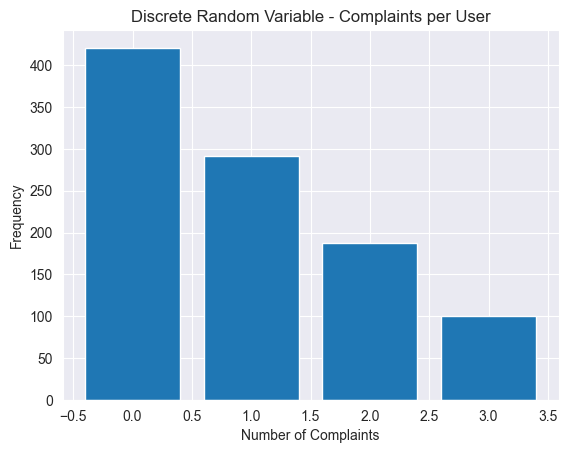

In [14]:
# simulate 1000 users , each can raise 0-3 complaints '
import matplotlib.pyplot as plt
np.random.seed(42)
complaints=np.random.choice([0,1,2,3],size=1000,p=[0.4,0.3,0.2,0.1])
# np.random.choice() : randomly picks values from a list based on defined probabilities.

#p=[0.4, 0.3, 0.2, 0.1] → defines how likely each value is to occur.
# Count frequency of each complaint count
unique,counts=np.unique(complaints,return_counts=True)

 #plot
plt.bar(unique,counts)
plt.title("Discrete Random Variable - Complaints per User")
plt.xlabel("Number of Complaints")
plt.ylabel("Frequency")
plt.show()

Simulating a Continuous Random Variable (e.g., session time in minutes)

np.random.normal(loc=20, scale=5) generates data around a normal distribution.

loc = mean, scale = std deviation.

plt.hist() → histogram = best for continuous data.



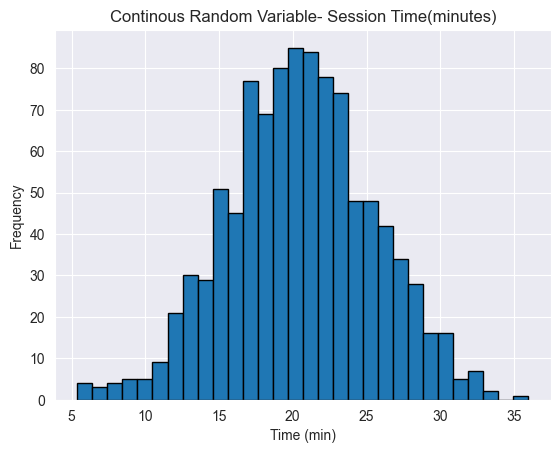

In [15]:
#Simulate 1000 session times using a normal distribution
session_time=np.random.normal(loc=20,scale=5,size=1000) # loc = mean and scale = std deviation

# plotting hsitogram as histogra is best for continous data
plt.hist(session_time,bins=30,edgecolor="black")
plt.title("Continous Random Variable- Session Time(minutes)")
plt.xlabel("Time (min)")
plt.ylabel("Frequency")
plt.show()

# Binomial Distribution
## Simulate Using NumPy

In [16]:
# Simulate 10,000 exp: 10 trials each,with 0.3 probability of success
simulated_data=np.random.binomial(n=10,p=0.3, size= 10000)

# check average result
print("mean of simulated results:",simulated_data.mean())


mean of simulated results: 2.9775


This is great for modeling user behavior or A/B testing in engineering

## Calculate Exact Probabilities using scipy.stats

In [17]:
from scipy.stats import binom

In [18]:
n = 10       # number of trials
p = 0.3      # probability of success

# PMF : Probability of getting exactly 3 success
print("P(X=3):", binom.pmf(k=3,n=n,p=p))

# CDF: Probability of getting at most 3 successes
print("P(X<=3):",binom.cdf(k=3,n=n,p=p))

# Mean and variance
print("Mean :", binom.mean(n=n,p=p))
print("Variance:",binom.var(n=n,p=p))

P(X=3): 0.2668279319999998
P(X<=3): 0.6496107184000001
Mean : 3.0
Variance: 2.1


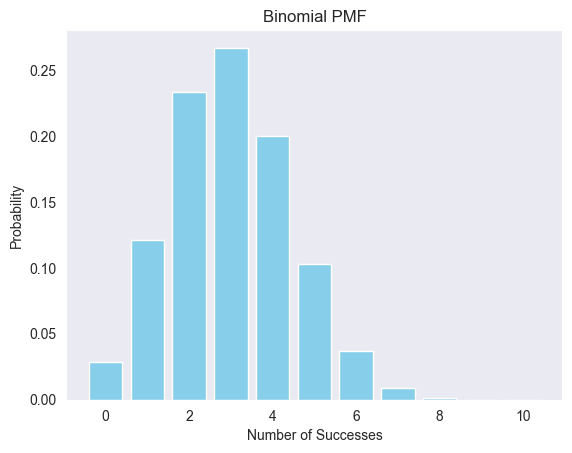

In [19]:
x = np.arange(0, n + 1)
pmf_values = binom.pmf(x, n, p)

plt.bar(x, pmf_values, color='skyblue')
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.title("Binomial PMF")
plt.grid()
plt.show()

## Poisson Distribution
To model : no of times an event happened in fixed interval (time,distance,area) and events occured independtly

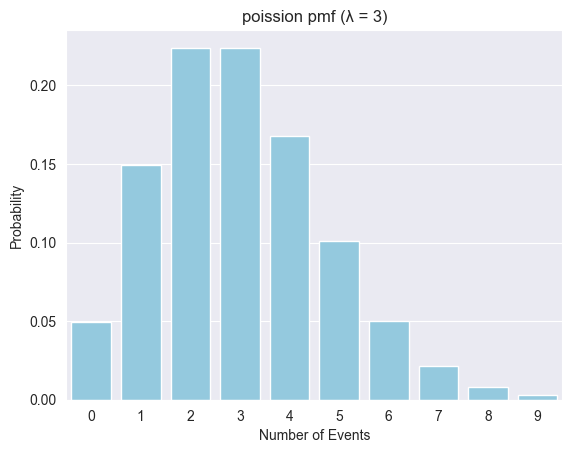

In [20]:
# Simulate: 10 values from a Poisson distribution with lambda = 3
np.random.poisson(lam=3, size=10)
#lam: lambda = 3
#Use this for simulations, bootstrapping, or fake data generation.
from scipy.stats import poisson
#Calculate PMF (probability of exact count)
poisson.pmf(k=4,mu=3) # prob of exactly 4 events when labmda = 3

#Cumulative Probability (≤ k events)
#probability of 4 or fewer events
poisson.cdf(k=4,mu=3)

#Visualize Poisson Distribution
import seaborn as sns
x=np.arange(0,10)
pmf_vals=poisson.pmf(x,mu=3)

sns.barplot(x=x,y=pmf_vals,color="Skyblue")
plt.title("poission pmf (λ = 3)")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.show()

## Fraud Detection Trigger Simulation

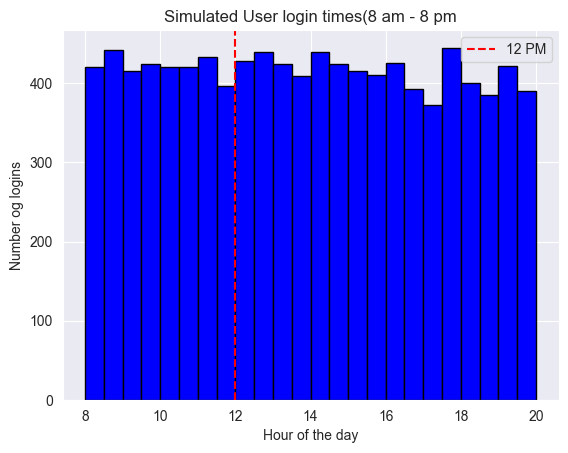

In [21]:
# 1. Simulate 10,000 random login times (in hours)
np.random.seed(42)
login_time=np.random.uniform(size=10000,low=8,high=20)

#plot the distribution
plt.hist(login_time,bins=24,edgecolor="black",color="blue")
plt.xlabel("Hour of the day")
plt.ylabel("Number og logins")
plt.title("Simulated User login times(8 am - 8 pm")
plt.axvline(x=12,color="red",linestyle="--",label="12 PM")
plt.legend()
plt.show()

In [22]:
# percentage of logins before 12
logins_before_12=np.sum(login_time<12)
percentage=logins_before_12/len(login_time) * 100
print(f" % of logins before 12 pm is {percentage:.2f}%")

 % of logins before 12 pm is 33.75%


Threshold checks              Like % before 12 PM can define "rush hours"

Random time-based simulation  Load testing, fraud detection triggers, system spikes

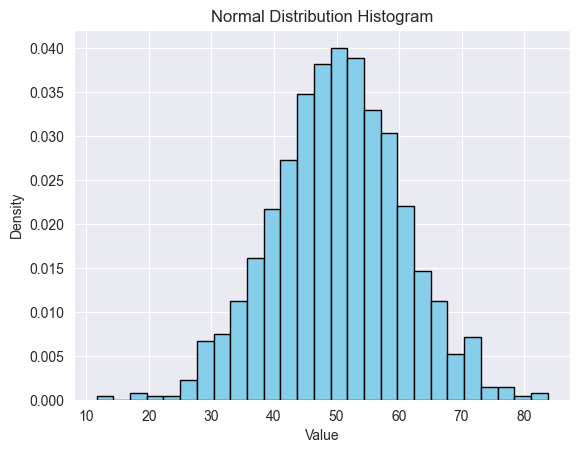

In [23]:
# Generate 1000 samples with mean=50 and std=10
data = np.random.normal(loc=50, scale=10, size=1000)

# Plot histogram
plt.hist(data, bins="auto", color='skyblue', edgecolor='black', density=True)
plt.title("Normal Distribution Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

PDF at x=55: 0.03520653267642995
CDF at x=55: 0.6914624612740131


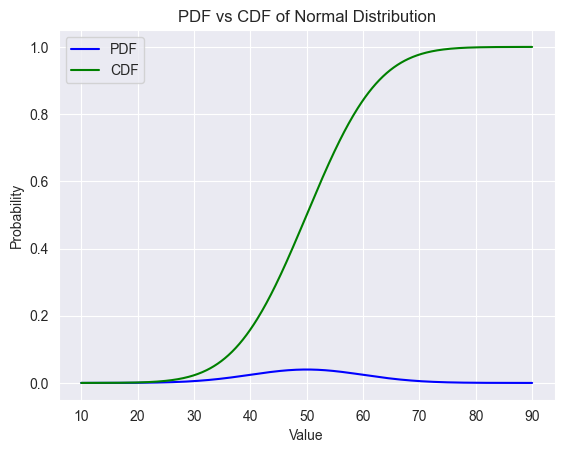

In [24]:
# Mean and std dev
from scipy.stats import norm
mu = 50
sigma = 10

# PDF at a point (e.g., x = 55)
pdf_val = norm.pdf(55, loc=mu, scale=sigma)
print("PDF at x=55:", pdf_val)

# CDF at a point (e.g., x = 55)
cdf_val = norm.cdf(55, loc=mu, scale=sigma)
print("CDF at x=55:", cdf_val)
x = np.linspace(10, 90, 500)
pdf = norm.pdf(x, loc=mu, scale=sigma)
cdf = norm.cdf(x, loc=mu, scale=sigma)

#Plottinig the cdf and pdf in normal distribution

plt.plot(x, pdf, label='PDF', color='blue')
plt.plot(x, cdf, label='CDF', color='green')
plt.legend()
plt.title("PDF vs CDF of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

In [25]:
# Use Case — Z-score and Probability
#hat’s the probability that a value is greater than 70?

# P(X > 70) = 1 - CDF(70)
prob = 1 - norm.cdf(70, loc=mu, scale=sigma)
print("P(X > 70):", prob)

P(X > 70): 0.02275013194817921


In [26]:
#Exponential Distribution

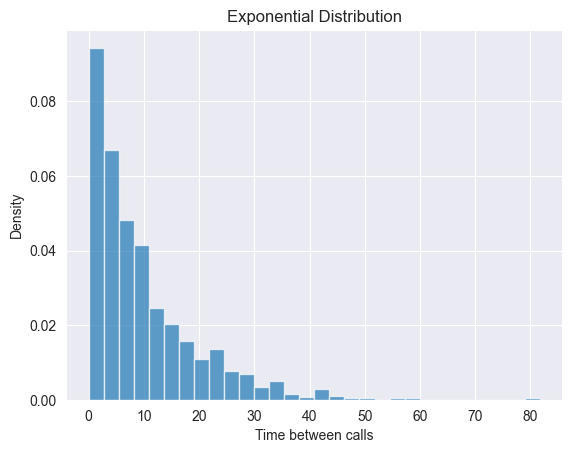

In [31]:
import numpy as np
np.random.seed(42)
times=np.random.exponential( scale=10,size=1000)

#plotting the histogram
plt.hist(times,bins=30,alpha=0.7,density=True)
plt.title("Exponential Distribution")
plt.xlabel("Time between calls")
plt.ylabel("Density")
plt.grid(True)
plt.show()
#scale=10 means on average, events happen every 10 minutes.
#The histogram is right-skewed — most events occur soon, few take long.



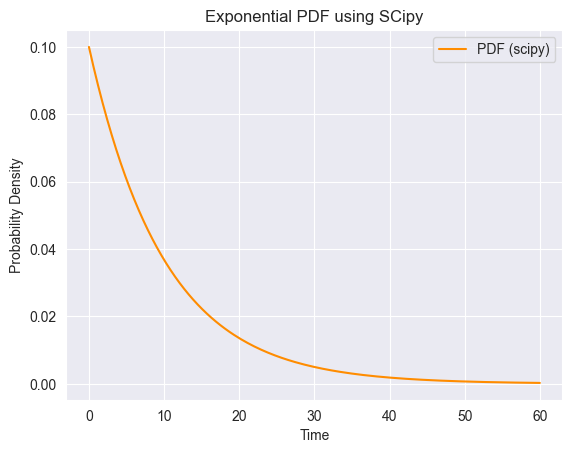

In [34]:
#code using scipy.stats.expon
from scipy.stats import expon

#Create exponential distribution with mean = 10
rv=expon(scale=10)

#PDF (Probability Distribution Function)
x=np.linspace(0,60,200)
pdf=rv.pdf(x)

plt.plot(x,pdf,color="darkorange",label="PDF (scipy)")
plt.title("Exponential PDF using SCipy")
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()

In [42]:
#bonus CDF "chances next call happens within X mins"
print("P(calls comes within 5 mins)",rv.cdf(5).round(2)) #p(x<=5)
print("P(calls comes after 15 mins)",rv.sf(15).round(2)) #survival function

P(calls comes within 5 mins) 0.39
P(calls comes after 15 mins) 0.22


In [49]:
#The Toolkit of Probability Distributions
# PMF — discrete
# Tossing 3 coins and chance of 2 heads
print("P(X=2 heads in 3 tosses):", binom.pmf(2, n=3, p=0.5).round(2))
# PDF — continuous
# probability of I will be exact 6ft
print("PDF at x=70 (height):", norm.pdf(70, loc=65, scale=3).round(2))
# CDF
# less than 6 feet
print("P(X <= 70):", norm.cdf(70, loc=65, scale=3).round(2))
# SF
#greater than 6 feet
print("P(X > 70):", norm.sf(70, loc=65, scale=3).round(2))
# PPF
print("Height at 95th percentile:", norm.ppf(0.95, loc=65, scale=3).round(2))

P(X=2 heads in 3 tosses): 0.38
PDF at x=70 (height): 0.03
P(X <= 70): 0.95
P(X > 70): 0.05
Height at 95th percentile: 69.93


## Descriptive Stats

In [55]:
# Mean (Arithmetic Average)

# using numpy
data=np.array([10,20,30,40,50,10000])
mean=np.mean(data).round(2)
print("Mean:",mean)

# Pandas
import pandas as pd
df=pd.DataFrame({"revenue" : [10,20,30,1000]})
print("Mean Revenue :",df["revenue"].mean())

from scipy import stats
print("mean (using scipy):",stats.tmean(data).round(2))

Mean: 1691.67
Mean Revenue : 265.0
mean (using scipy): 1691.67


In [58]:
 # Median
data = np.array([10, 20, 30, 1000])
median = np.median(data)
print("Median:", median)

df = pd.DataFrame({'salaries': [10, 20, 30, 1000]})
print("Median Salary:", df['salaries'].median())

Median: 25.0
Median Salary: 25.0


In [64]:
# mode
#  NumPy (returns smallest mode if multiple)
data=np.array([1,2,3,4,5,6,7,8,4,2,3,5,4,4,6,7,5,2,3,4,4,6,])
mode=stats.mode(data,keepdims=False)
print("Mode:",mode.mode,"Count:",mode.count)

# for categorical values we use mode in pandas which return series
df = pd.DataFrame({'cuisine': ['Indian', 'Chinese', 'Indian', 'Mexican', 'Indian']})
print("Mode Cuisine:", df['cuisine'].mode()[0])

Mode: 4 Count: 6
Mode Cuisine: Indian


In [66]:
# variance
data=[5,10,15,20,25,45]

#sample variance
sample_var=np.var(data,ddof=1)
print("sample_var",sample_var)

#population variance
pop_var=np.var(data)
print("pop_var",pop_var)

sample_var 200.0
pop_var 166.66666666666666


In [67]:
#using pandas
df=pd.DataFrame({"value": data})
sample_var_pd=df["value"].var() #pandas already use ddof=1 (sample variance)
print("sample variance using pandas",sample_var_pd)


sample variance using pandas 200.0


In [71]:
# stats model (statistics reports)
import statsmodels.api as sm

#convert list to series first
data_series=pd.Series(data)

# Describe using statsmodel and using DescrStatsW() function
desc=sm.stats.DescrStatsW(data_series)
print(desc)
# sample variance
sample_var_sm=desc.var
print("sample variance (StatsModel):",sample_var_sm)

sample variance (StatsModel): 166.66666666666666


In [73]:
# Standard deviation
#Code Implementation (NumPy + Scipy + Statsmodels)

data = [10, 12, 23, 23, 16, 23, 21, 16]
std_dev=np.std(data) #population std (ddof=0)
sample_std_dev=np.std(data,ddof=1)
print("Standard deviation (population):", std_dev)
print("Standard deviation(sample):",sample_std_dev)
#ddof=1 means you are using n-1, which is standard for sample standard deviatio

Standard deviation (population): 4.898979485566356
Standard deviation(sample): 5.237229365663817


In [79]:
#With statsmodel
import statsmodels.api as sm
data_series=pd.Series(data)

desc=sm.stats.DescrStatsW(data_series) #DescrStatsW gives weighted statistics, but works fine without weights.
print("standard deviation of data is :",desc.std.round(2))

standard deviation of data is : 4.9


## skewness
scipy (prefered for skewness)

In [87]:
import scipy.stats
data=[10, 12, 23, 23, 16, 23, 21, 16]
print("Skewness:" ,scipy.stats.skew(data))

Skewness: -0.363596133694378


data is -ve means left skewed (mean<median)

In [90]:
# kurtosis

Normal Distribution Kurtosis: 2.95
Laplace Distribution Kurtosis: 6.22


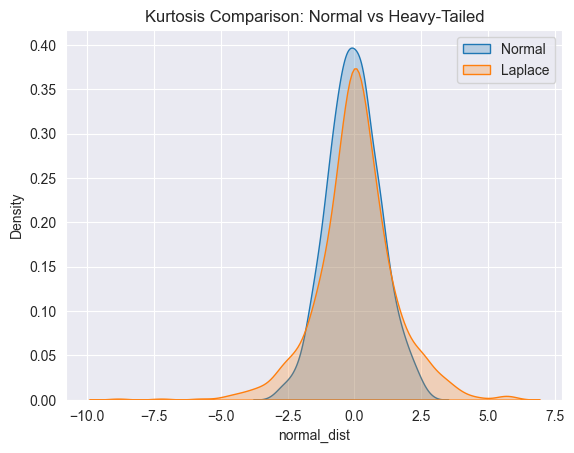

In [4]:
from scipy.stats import kurtosis
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)
data = pd.DataFrame({
    'normal_dist': np.random.normal(loc=0, scale=1, size=1000),
    'heavy_tailed': np.random.laplace(loc=0, scale=1, size=1000)
})

# Calculate kurtosis
kurt_norm = kurtosis(data['normal_dist'], fisher=False)
kurt_laplace = kurtosis(data['heavy_tailed'], fisher=False)

print(f"Normal Distribution Kurtosis: {kurt_norm:.2f}")
print(f"Laplace Distribution Kurtosis: {kurt_laplace:.2f}")
# Visual comparison
sns.kdeplot(data['normal_dist'], label="Normal", fill=True)
sns.kdeplot(data['heavy_tailed'], label="Laplace", fill=True)
plt.title("Kurtosis Comparison: Normal vs Heavy-Tailed")
plt.legend()
plt.show()


       values   z_score outlier
0  124.365180  1.616235  Normal
1   90.823654 -0.663166  Normal
2   92.077424 -0.577963  Normal
3   83.905471 -1.133309  Normal
4  112.981114  0.842601  Normal


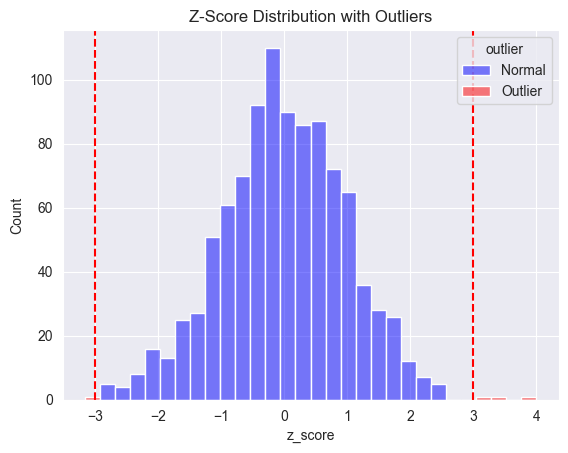

In [6]:
#Z-Score & Outlier Detection
# Generate synthetic data
from scipy.stats import zscore
np.random.seed(1)
data = pd.DataFrame({
    'values': np.random.normal(loc=100, scale=15, size=1000)
})

# Calculate Z-scores
data['z_score'] = zscore(data['values'])

# Tag outliers: beyond ±3
data['outlier'] = data['z_score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')

# Display Z-score summary
print(data[['values', 'z_score', 'outlier']].head())

# Visualize Z-score distribution
sns.histplot(data, x='z_score', hue='outlier', bins=30, palette={'Normal': 'blue', 'Outlier': 'red'})
plt.axvline(3, color='red', linestyle='--')
plt.axvline(-3, color='red', linestyle='--')
plt.title("Z-Score Distribution with Outliers")
plt.show()

# 🧠 Applied Statistics Journey — Shiva

This repository documents my hands-on learning and mastery of core **Applied Statistics** concepts, tools, and real-world intuition — designed for use in **data analysis, business decision-making, and ML modeling**.

---

## 📌 Core Concepts Covered

| Concept Group              | Topics                                                                 |
|---------------------------|------------------------------------------------------------------------|
| 📊 Probability             | Empirical Probability, Random Events, Simulations                     |
| 📈 Distributions           | Binomial, Poisson, Uniform, Normal, Exponential                       |
| 🧩 PDF / PMF / CDF         | Visualized and implemented using NumPy & Seaborn                      |
| 📍 Central Tendency        | Mean, Median, Mode (with business use cases)                          |
| 🎯 Dispersion              | Variance, Standard Deviation                                           |
| 🔁 Shape of Distribution   | Skewness, Kurtosis                                                     |
| 🚨 Standardization         |

---

## 🛠 Tools & Libraries Used

- **Python**
- **NumPy**: Statistical calculations and simulations
- **Pandas**: DataFrame-based EDA and transformations
- **SciPy**: Scientific and statistical functions (`scipy.stats`)
- **Matplotlib / Seaborn**: Visual diagnostics and distributions

---

## ✅ Key Learning Strategies

- 📓 Manual notes for concept retention
- 📊 Code-first approach using PyCharm
- 📤 Code and results versioned here for future ML use
- 🧠 Real-world interpretation of every stat — business-first mindset
- 🧪 Using multiple libraries (NumPy, SciPy) for cross-verification

---

## 🚀 What’s Coming Next

> The learning is structured in two phases:
- **Phase 1 – Core Stats (Current)**
- **Phase 2 – Hypothesis Testing, Confidence Intervals, A/B Testing, ANOVA, Power Analysis**

Post that, this repo will serve as a **foundation for Machine Learning explainability and model evaluation**.

---

